In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2 as cv

In [2]:
path = os.getcwd() + '/yalefaces'
print('Current path: ' + os.getcwd())

Current path: /Users/matthewlucente/Desktop/snr szn/spring/cs383/1 - Dimensionality Reduction


In [3]:
# (1) Read the list of files

files = []

for (root, dirs, file) in os.walk(path):
    for f in file:
        files.append(os.path.join(root, f))

In [4]:
# (2) Read image, resize, flatten, concatenate to data matrix

rem = os.getcwd() + '/yalefaces/.DS_Store' # i am not sure why there was this file in here... 
if rem in files:
    files.remove(rem)

data_matrix = []

for i in files:
    image = Image.open(i)
    resized = image.resize((40,40))
    flattened = np.array(resized).flatten()
    data_matrix.append(flattened)

data_matrix = np.array(data_matrix)

In [5]:
# PCA - Centre the data and calculate covariance matrix

mean = np.mean(data_matrix, axis=0, keepdims=True)
standardized = data_matrix - mean
cov = np.cov(standardized, rowvar=False, ddof=1)

In [6]:
# PCA - Get eigenvectors and eigenvalues
# Sort eigenvectors by eigenvalues in descending order

eigenvalues, eigenvectors = np.linalg.eig(cov)
index = np.argsort(eigenvalues)[::-1]
sortedEigenvectors = eigenvectors[:,index]

In [7]:
# PCA - Choose top 2 (k = 2) eigenvectors
# Transform chosen eigenvectors and multiply it by the transformation of data (PCA projeciton)

k=2
chosenEigenvectors = sortedEigenvectors[:, :k]
pca_projection = (chosenEigenvectors.T @ standardized.T).T

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


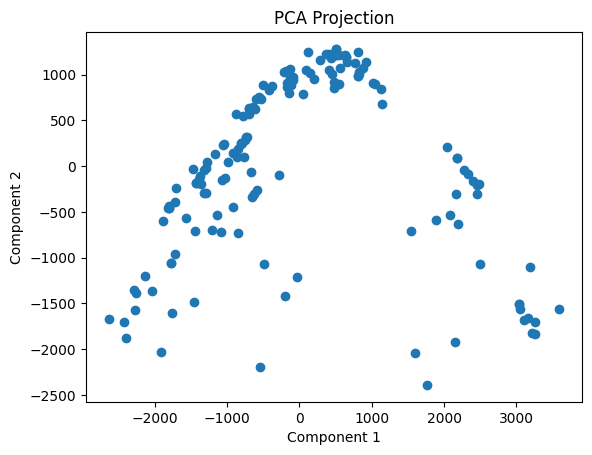

In [8]:
# PCA - Display the projection

plt.scatter(pca_projection[:,0], pca_projection[:,1])
plt.title('PCA Projection')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [9]:
# (3) Eigenfaces
# Locate target image
# Create video object

target_path = os.getcwd() + '/yalefaces/subject02.centerlight'
target_index = files.index(target_path)
target_image = standardized[target_index]

out = cv.VideoWriter("eigenfaces_reconstruction.avi",cv.VideoWriter.fourcc(*'XVID'),15, (40,40),False)

In [10]:
# Reconstruct image and export as a video

for k in range(0,1600):
    newTarget = np.atleast_2d(target_image @ sortedEigenvectors[:, :k])
    pca_image = newTarget @ sortedEigenvectors[:, :k].T
    pca_image += mean
    reshaped = np.reshape(pca_image, (40,40)).astype('uint8')
    out.write(reshaped)

out.release()

/var/folders/nk/syqrsf691mgb0zs1nm4gbkfh0000gn/T/ipykernel_5721/1433185012.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  reshaped = np.reshape(pca_image, (40,40)).astype('uint8')
